# Decision Tree Classifier

1. Import libraries
2. Load dataset
3. Visualize
4. Apply model
5. Evaluate with various metrics
6. Plot tree

# 1. Import

In [1]:
#importing all we need

import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_iris 
from sklearn.datasets import load_boston
from sklearn import tree
from sklearn import model_selection

# 2. Load

In [2]:
#loading datasets

#iris classification
iris = load_iris()
X = iris.data[:,:4]  #defualt load is numpy
df = pd.DataFrame(X)
Y = iris.target
tar = pd.DataFrame(Y)

peek at data, dimensions, co relations,

In [3]:
df.shape # check number of samples and thier colunms

(150, 4)

In [4]:
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.corr()

,0,1,2,3
0,1.000000,-0.117570,0.871754,0.817941
1,-0.117570,1.000000,-0.428440,-0.366126
2,0.871754,-0.428440,1.000000,0.962865
3,0.817941,-0.366126,0.962865,1.000000


In [6]:
tar.info() # features detail
tar.nunique() # number of output classes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
0    150 non-null int64
dtypes: int64(1)
memory usage: 1.2 KB


0    3
dtype: int64

# 3. Visualize

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0815d59610>,
      dtype=object)

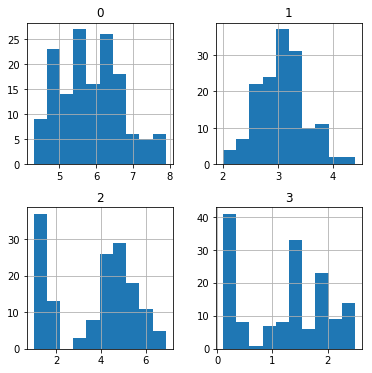

In [8]:
df.hist(figsize=(6,6)) # check feature data distribution for outliers, boundary range etc

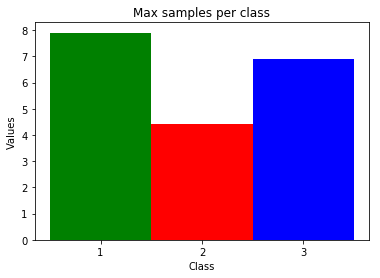

In [30]:
# plot per class outpur numbers 
values = 0.5 # bar size/pos
width= 0.30 # bar width
names = ['1','2','3']
val = [0.5,0.8,1.1]
bar1 = plt.bar(values, df[0].max(), width, color='green')
bar2 = plt.bar(values+width, df[1].max(), width, color='red')
bar3 = plt.bar(values+(width*2), df[2].max(), width, color='blue')
barplot = [bar1,bar2,bar3]
plt.xticks(val, names)
plt.xlabel("Class")
plt.ylabel("Values")
plt.title("Max samples per class")
plt.show()

In [11]:
#Classification two critereons
Entropy = DecisionTreeClassifier(criterion='entropy',presort = True, random_state = 42)
Gini = DecisionTreeClassifier(criterion='gini', presort = True, splitter='best', random_state = 42)
Entropy.fit(df,tar)
Gini.fit(df,tar)
#fitting all dataset

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=42, splitter='best')

# Evaluate model

classification : Cross_val_score, accuracy, classification report, confusion matrix, F1

for classification best is to find accuracy_metric and look at confusion_matrix
otherwise try cross validation instead.




# Cross Validation for scoring

Cross validation is best way to carry out validation, as it checks through all the data in k folds. a per k fold is used as testing data against the remaining data. 
Returns a matrix of all testing result, so better to take thier mean to get the result.

In [13]:
# cross_val_score
#Has its own Train,Test splits. Does Cross validation
from sklearn.model_selection import cross_val_score

#Makes the data into N-splits folds,each kth fold is used once as validation set.
kfold = model_selection.KFold(n_splits = 15,random_state = 7)

#for classification we prefer scoring accuracy metric
#Entropy
#if we dont give kfold default is 3
results = cross_val_score(Entropy, df, tar, cv=3, scoring = 'accuracy')
print('Cross val score for entropy: %.2f%% (%.2f)' % (results.mean()*100, results.std()))

results = cross_val_score(Entropy, df, tar, cv=kfold, scoring = 'accuracy')
print('Cross val score entropy with kfold: %.2f%% (%.2f)' % (results.mean()*100, results.std()))

#Gini
results = cross_val_score(Gini, df, tar, cv=3, scoring = 'accuracy')
print('Cross val score For gini: %.2f%% (%.2f)' % (results.mean()*100, results.std()))

Cross val score for entropy: 96.04% (0.03)
Cross val score entropy with kfold: 92.67% (0.11)
Cross val score For gini: 96.04% (0.03)


# Using singular metrics 

In [14]:
# creates a train/test split for metrics

from sklearn.metrics import accuracy_score
entro = DecisionTreeClassifier(criterion='entropy',presort = True, random_state = 42)
gin = DecisionTreeClassifier(criterion='gini', presort = True, splitter='best', random_state = 42)

#fitting with train/test split
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(df,tar,test_size = 0.30, random_state=42)
entro.fit(X_train, Y_train)
gin.fit(X_train, Y_train)

#predicting only takes ip features
pred_entro = entro.predict(X_test)
pred_gin = gin.predict(X_test)

In [15]:
#accuracy metric
# Measures the right prediction over all remaining elements
accu = accuracy_score(Y_test, pred_entro)
print('Accuracy for Entropy: %.2f%%'% accu)
accu1 = accuracy_score(Y_test, pred_gin)
print('Acurracy for Gini: %.2f%%'% accu1)

Accuracy for Entropy: 0.98%
Acurracy for Gini: 1.00%


In [33]:
#classification report

# report showing the main classification metrics 

from sklearn.metrics import classification_report

clr = classification_report(Y_test, pred_entro)
print(clr)
clr1 = classification_report(Y_test, pred_gin)
print(clr1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
# precision is how many are correct from predicted.
# recall is how many more should have been corect from overall.
# f1 score combination of precision and recall, if both are high then f1_score is higher.

Cofusion matrix

In [18]:
#confusion matrix

# showing TP,TN,FP,FN values per class.

from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(Y_test,pred_entro)
cfm1 = confusion_matrix(Y_test,pred_gin)
print("Entropy\n",cfm)
print('\n')
print("Gini\n",cfm1)

Entropy
 [[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]


Gini
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [19]:
#F1 score
from sklearn.metrics import f1_score

f1sc = f1_score(Y_test, pred_entro , average = 'weighted')
print("F1 Score for Entropy: ",f1sc)


F1 Score for Entropy:  0.9777448559670783


In [20]:
# more metrics
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

# Plot Tree

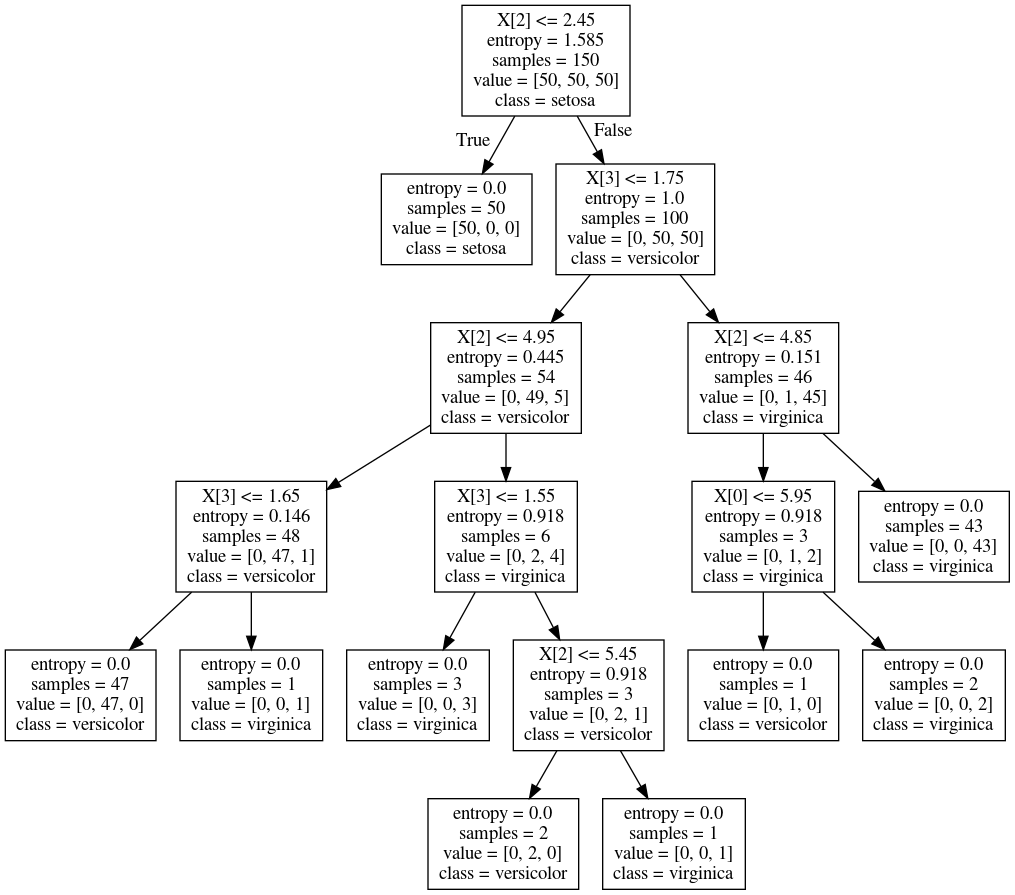

In [22]:
from graphviz import Source
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

# Create DOT data
dot_data = tree.export_graphviz(Entropy, out_file=None, 
                                feature_names=None,  
                                class_names=iris.target_names)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())
